In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("all_train.csv")

In [3]:
df2 = pd.read_csv("all_test.csv")

In [4]:
df.index = range(1,123)
df2.index = range(123,261)

In [5]:
train = df[df.time<=104]
valid = df[df.time>104]

time

In [6]:
from statsmodels.tsa.arima.model import ARIMA

In [7]:
train1 = train.TOTAL_TICKETS.values
valid1 = valid.TOTAL_TICKETS.values

In [49]:
history = [x for x in train1]
# fit model
model = ARIMA(history, order=(26, 1, 4))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(start=104, end=121, typ='levels')
predictions = list(yhat)

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Valid RMSE: 3467183.456
Valid MAPE: 20.694


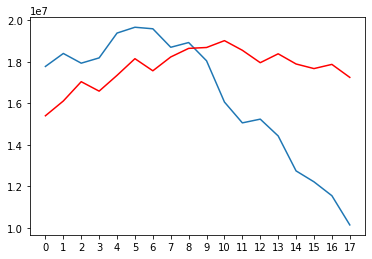

In [10]:
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(valid1, predictions))
mape = np.mean(np.abs((valid1 - predictions) / valid1)) * 100
print('Valid RMSE: %.3f' % rmse)
print('Valid MAPE: %.3f' % mape)
# plot forecasts against actual outcomes
plt.plot(valid1)
plt.plot(predictions, color='red')
plt.xticks(range(0,18))
plt.show()

In [11]:
train0 = df.TOTAL_TICKETS.values

In [46]:
history = [x for x in train0]
predictions = list()
# fit model
model = ARIMA(history, order=(52, 1, 4))
model_fit = model.fit()
# make prediction
for x in range(1,261):
    output = model_fit.predict(start=x, end=x)
    yhat = output[0]
    predictions.append(yhat)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


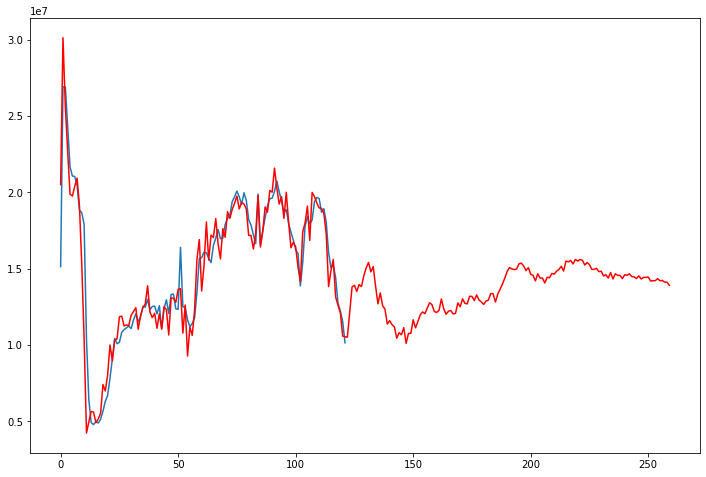

In [47]:
# forecasts
plt.figure(figsize=(12,8))
plt.plot(train0)
plt.plot(predictions, color='red')
plt.show()

In [51]:
history = [x for x in train1]
predictions = list()
# fit model
model = ARIMA(history, order=(26, 1, 4))
model_fit = model.fit()
# make prediction
for x in range(1,261):
    output = model_fit.predict(start=x, end=x)
    yhat = output[0]
    predictions.append(yhat)

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


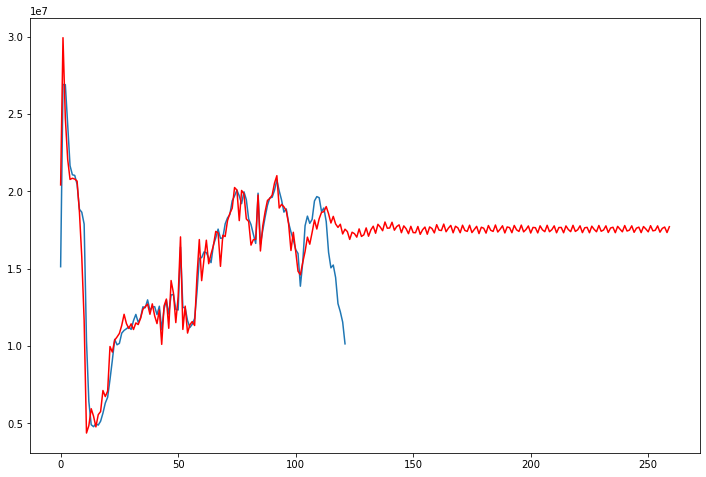

In [15]:
# forecasts
plt.figure(figsize=(12,8))
plt.plot(train0)
plt.plot(predictions, color='red')
plt.show()

time + oil

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [17]:
train_ex1 = train["Oil Price"].values
valid_ex1 = valid["Oil Price"].values
train_ex2 = train["covid_policy"].values
valid_ex2 = valid["covid_policy"].values
ex1 = df["Oil Price"].values
ex2 = df["covid_policy"].values
ex11 = df2["Oil Price"].values
ex22 = df2["covid_policy"].values

In [18]:
history = [x for x in train1]
ext = [y for y in train_ex1]
# fit model
model = SARIMAX(history, exog=ext, order=(26, 1, 4), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(start=104, end=121, exog=[valid_ex1])
predictions = list(yhat)

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Valid RMSE: 6938970.513
Valid MAPE: 39.401


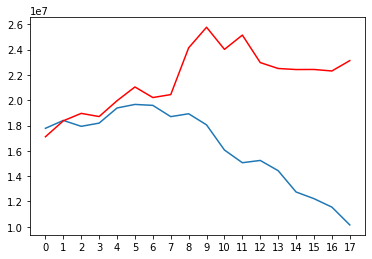

In [19]:
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(valid1, predictions))
mape = np.mean(np.abs((valid1 - predictions) / valid1)) * 100
print('Valid RMSE: %.3f' % rmse)
print('Valid MAPE: %.3f' % mape)
# plot forecasts against actual outcomes
plt.plot(valid1)
plt.plot(predictions, color='red')
plt.xticks(range(0,18))
plt.show()

In [52]:
history = [x for x in train0]
ext = [y for y in ex1]
predictions = list()
# fit model
model = SARIMAX(history, exog=ext, order=(52, 1, 4), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(start=0, end=259, exog=[ex11])
predictions = list(yhat)

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


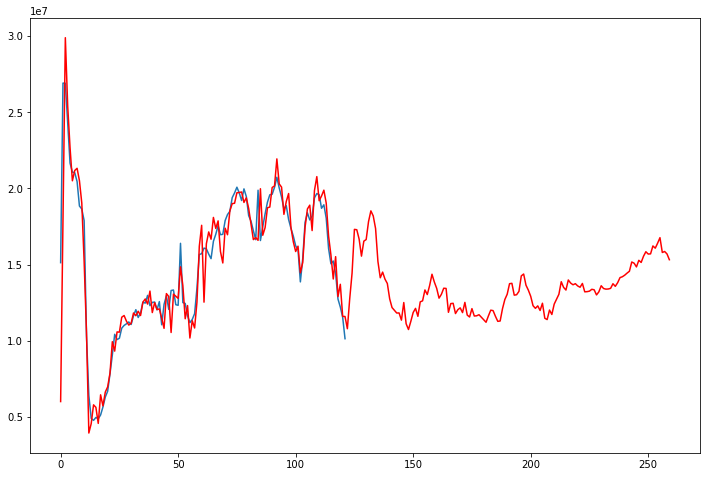

In [53]:
# forecasts
plt.figure(figsize=(12,8))
plt.plot(train0)
plt.plot(predictions, color='red')
plt.show()

In [22]:
history = [x for x in train1]
ext = [y for y in train_ex1]
predictions = list()
# fit model
model = SARIMAX(history, exog=ext, order=(26, 1, 4), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(start=0, end=259, exog=[pd.concat([valid["Oil Price"], df2["Oil Price"]]).values])
predictions = list(yhat)

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


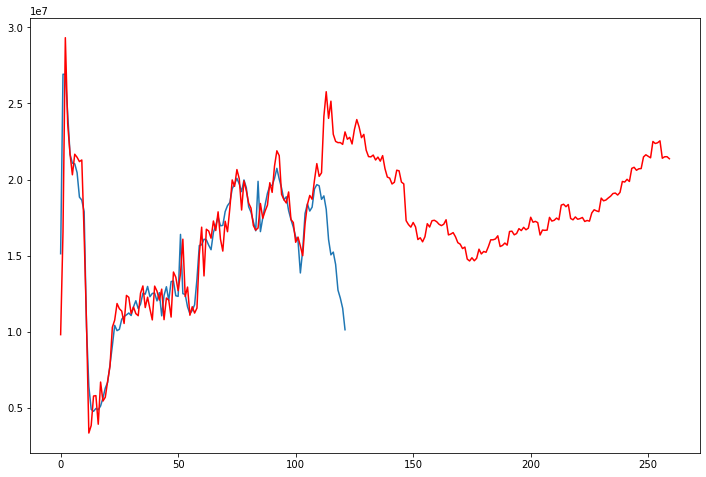

In [23]:
# forecasts
plt.figure(figsize=(12,8))
plt.plot(train0)
plt.plot(predictions, color='red')
plt.show()

time + covid policy

In [24]:
history = [x for x in train1]
ext = [y for y in train_ex2]
# fit model
model = SARIMAX(history, exog=ext, order=(26, 1, 4), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(start=104, end=121, exog=[valid_ex2])
predictions = list(yhat)

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Valid RMSE: 4320824.481
Valid MAPE: 25.957


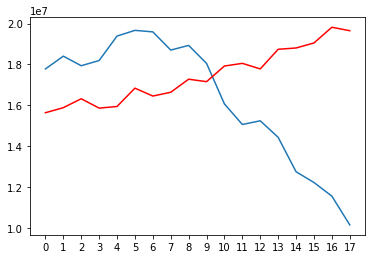

In [25]:
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(valid1, predictions))
mape = np.mean(np.abs((valid1 - predictions) / valid1)) * 100
print('Valid RMSE: %.3f' % rmse)
print('Valid MAPE: %.3f' % mape)
# plot forecasts against actual outcomes
plt.plot(valid1)
plt.plot(predictions, color='red')
plt.xticks(range(0,18))
plt.show()

In [54]:
history = [x for x in train0]
ext = [y for y in ex2]
predictions = list()
# fit model
model = SARIMAX(history, exog=ext, order=(52, 1, 4), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(start=0, end=259, exog=[ex22])
predictions = list(yhat)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


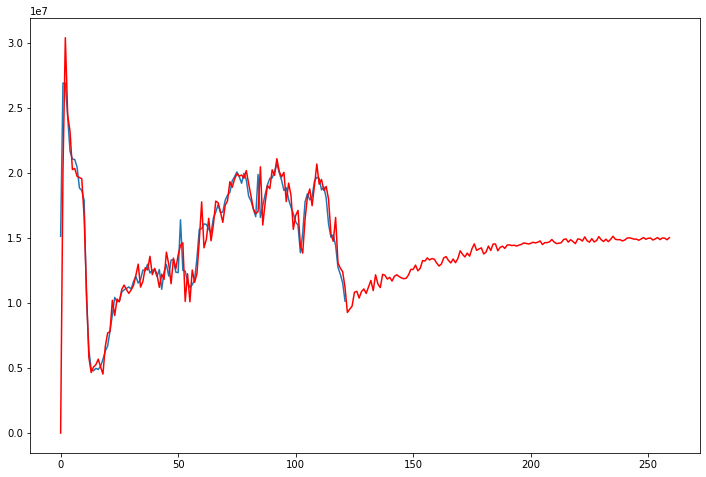

In [55]:
# forecasts
plt.figure(figsize=(12,8))
plt.plot(train0)
plt.plot(predictions, color='red')
plt.show()

In [28]:
history = [x for x in train1]
ext = [y for y in train_ex2]
predictions = list()
# fit model
model = SARIMAX(history, exog=ext, order=(26, 1, 4), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(start=0, end=259, exog=[pd.concat([valid["covid_policy"], df2["covid_policy"]]).values])
predictions = list(yhat)

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


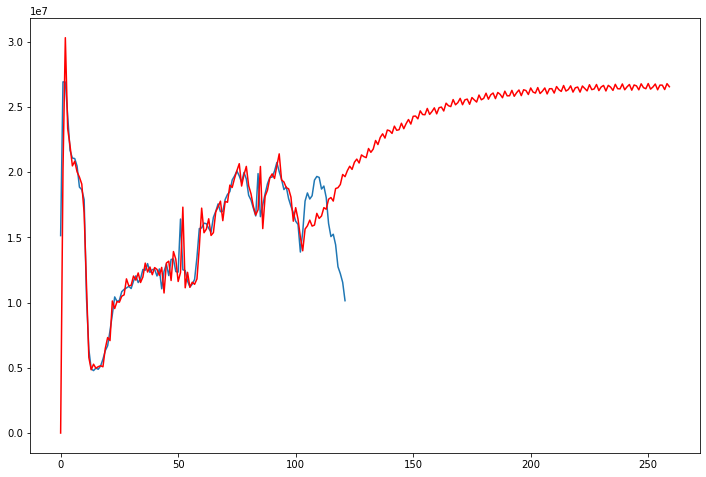

In [29]:
# forecasts
plt.figure(figsize=(12,8))
plt.plot(train0)
plt.plot(predictions, color='red')
plt.show()

time + oil + covid policy

In [30]:
train_ex12 = train[["Oil Price", "covid_policy"]].values
valid_ex12 = valid[["Oil Price", "covid_policy"]].values
ex3 = df[["Oil Price", "covid_policy"]].values
ex33 = df2[["Oil Price", "covid_policy"]].values

In [31]:
history = [x for x in train1]
ext = [y for y in train_ex12]
# fit model
model = SARIMAX(history, exog=ext, order=(26, 1, 4), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(start=104, end=121, exog=[valid_ex12])
predictions = list(yhat)

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Valid RMSE: 4412345.663
Valid MAPE: 26.312


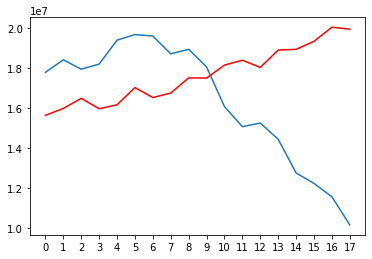

In [32]:
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(valid1, predictions))
mape = np.mean(np.abs((valid1 - predictions) / valid1)) * 100
print('Valid RMSE: %.3f' % rmse)
print('Valid MAPE: %.3f' % mape)
# plot forecasts against actual outcomes
plt.plot(valid1)
plt.plot(predictions, color='red')
plt.xticks(range(0,18))
plt.show()

In [56]:
history = [x for x in train0]
ext = [y for y in ex3]
predictions = list()
# fit model
model = SARIMAX(history, exog=ext, order=(52, 1, 4), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(start=0, end=259, exog=[ex33])
predictions = list(yhat)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


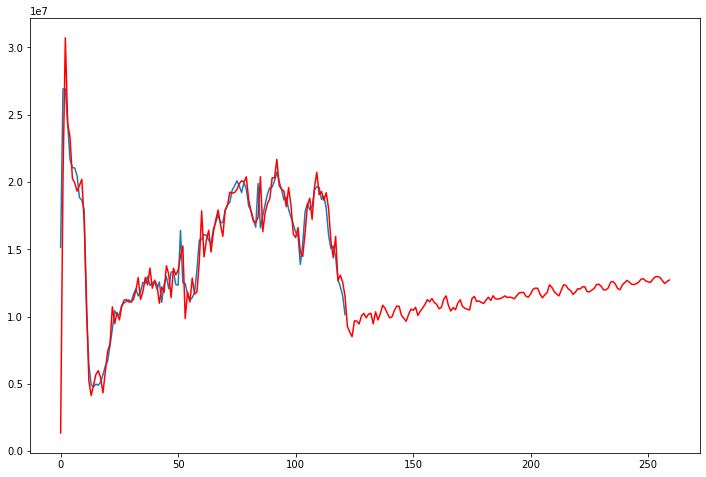

In [57]:
# forecasts
plt.figure(figsize=(12,8))
plt.plot(train0)
plt.plot(predictions, color='red')
plt.show()

In [35]:
history = [x for x in train1]
ext = [y for y in train_ex12]
predictions = list()
# fit model
model = SARIMAX(history, exog=ext, order=(26, 1, 4), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(start=0, end=259, exog=[pd.concat([valid[["Oil Price", "covid_policy"]], df2[["Oil Price", "covid_policy"]]]).values])
predictions = list(yhat)

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


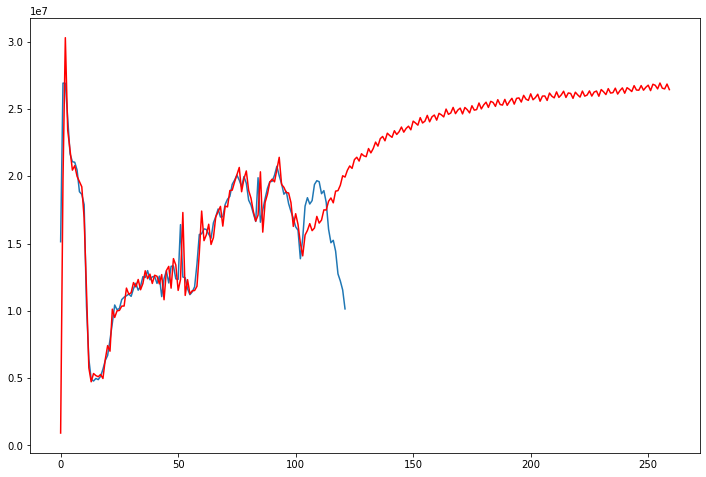

In [36]:
# forecasts
plt.figure(figsize=(12,8))
plt.plot(train0)
plt.plot(predictions, color='red')
plt.show()